In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
from keras.callbacks import ModelCheckpoint
from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from keras.models import Model

Using TensorFlow backend.


# Reading the cleaned dataset.


In [2]:
sample = pd.read_csv('nan_clean_dataset.csv')

In [3]:
sample.isnull().sum()

Unnamed: 0                       0
Unnamed: 0.1                     0
user_id                          0
business_id                      0
review_id                        0
rating                           0
date                             0
useful_x                         0
funny_x                          0
cool_x                           0
text                             0
name_x                           0
address                       2222
city                             0
state                            0
postal_code                    405
latitude                         0
longitude                        0
stars                            0
review_count_x                   0
category                         0
RestaurantsTakeOut               0
RestaurantsPriceRange2           0
GoodForKids                      0
HasTV                            0
RestaurantsGoodForGroups         0
RestaurantsReservations          0
WiFi                             0
RestaurantsAttire   

# Creating a dictionary for mapping user_id and business_id to integer values

In [4]:
d = dict([(y,x+1) for x,y in enumerate(sorted(set(sample['user_id'])))])
print(d[x] for x in sample['user_id'])
#print(X_train_array[0])
#max_value = max(d.values())
#print(max_value)
l = []
for i in sample['user_id']:
     l.append(d[i])

sample['USER_ID']=l
        
db = dict([(y,x+1) for x,y in enumerate(sorted(set(sample['business_id'])))])
print(db[x] for x in sample['business_id'])
#print(X_train_array[0])
lb=[]
for i in sample['business_id']:
    lb.append(db[i])

sample['BUSINESS_ID']=lb

<generator object <genexpr> at 0x000001EA8F6BA248>
<generator object <genexpr> at 0x000001EA8F6BA248>


# Reading the X_test, X_train, y_test and y_train created previously.
 

In [5]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [10]:
X_train = X_train.drop(columns=['Unnamed: 0'])
X_test = X_test.drop(columns=['Unnamed: 0'])
y_test = y_test.drop(columns=['Unnamed: 0'])
y_train = y_train.drop(columns=['Unnamed: 0'])

# Mapping user_ids and business_ids in the X_train and X_test dataframe to the dictionary created.

In [11]:
l = []
for i in X_train['user_id']:
     l.append(d[i])

X_train['USER_ID'] = l

k = []
for i in X_test['user_id']:
     k.append(d[i])
        
X_test['USER_ID'] = k

In [12]:
l = []
for i in X_train['business_id']:
     l.append(db[i])

X_train['BUSINESS_ID'] = l

k = []
for i in X_test['business_id']:
     k.append(db[i])
        
X_test['BUSINESS_ID'] = k

In [13]:
sample.head()
dataset = sample[['rating','USER_ID','BUSINESS_ID']]
dataset.shape

(947066, 3)

# Getting the number of unique values of the features to be supplied in the deep learning model.

In [14]:
n_users = len(sample.USER_ID.unique())
n_users

66968

In [15]:
n_busi = len(sample.BUSINESS_ID.unique())
n_busi

18208

In [16]:
n_stars = len(sample.stars.unique())
n_stars

9

In [17]:
n_useful = sample.useful_x.max()
n_useful = int(n_useful)
n_useful

333

In [18]:
n_restakeout = len(sample.RestaurantsTakeOut.unique())
n_restakeout

2

In [19]:
n_resprice = len(sample.RestaurantsPriceRange2.unique())
n_resprice

5

In [20]:
n_funny = sample.funny_x.max()
n_funny = int(n_funny)
type(n_funny)
n_funny

201

In [21]:
n_cool = sample.cool_x.max()
n_cool = int(n_cool)
n_cool

290

In [22]:
cols = ['useful_x']
X_train[cols] = X_train[cols].applymap(np.float64)

In [23]:
cols = ['RestaurantsTakeOut']
X_train[cols] = X_train[cols].applymap(np.float64)

In [24]:
cols = ['RestaurantsTakeOut']
X_test[cols] = X_test[cols].applymap(np.float64)

In [25]:
X_train.loc[(X_train.RestaurantsPriceRange2 == 'None'),'RestaurantsPriceRange2'] = 0.0
cols = ['RestaurantsPriceRange2']
X_train[cols] = X_train[cols].applymap(np.float64)


In [26]:
X_test.loc[(X_test.RestaurantsPriceRange2 == 'None'),'RestaurantsPriceRange2'] = 0.0
cols = ['RestaurantsPriceRange2']
X_test[cols] = X_test[cols].applymap(np.float64)


In [27]:
sample.GoodForKids.unique()
n_goodforkids = len(sample.GoodForKids.unique())
n_goodforkids

2

In [28]:
sample.HasTV.unique()
n_hastv = len(sample.HasTV.unique())
n_hastv

2

In [29]:
sample.RestaurantsGoodForGroups.unique()
n_resgrp = len(sample.RestaurantsGoodForGroups.unique())
n_resgrp

2

In [30]:
sample.RestaurantsReservations.unique()
n_resreserve = len(sample.RestaurantsReservations.unique())
n_resreserve

2

In [31]:
sample.RestaurantsDelivery.unique()
n_resdelivery = len(sample.RestaurantsDelivery.unique())
n_resdelivery

2

In [32]:
sample.OutdoorSeating.unique()
n_outdoor = len(sample.OutdoorSeating.unique())
n_outdoor

2

In [33]:
sample.BikeParking.unique()
n_bike = len(sample.BikeParking.unique())
n_bike

2

# Cleaning some of the feature columns according to the embeddings model requirement.


In [34]:
sample.Alcohol.unique()
X_train.loc[(X_train.Alcohol == 'None'),'Alcohol'] = 0.0
X_train.loc[(X_train.Alcohol == 'full_bar'),'Alcohol'] = 1.0
X_train.loc[(X_train.Alcohol == 'beer_and_wine'),'Alcohol'] = 2.0
X_test.loc[(X_test.Alcohol == 'None'),'Alcohol'] = 0.0
X_test.loc[(X_test.Alcohol == 'full_bar'),'Alcohol'] = 1.0
X_test.loc[(X_test.Alcohol == 'beer_and_wine'),'Alcohol'] = 2.0


In [35]:
X_test.Alcohol.unique()
n_alcohol = len(X_test.Alcohol.unique())
n_alcohol

3

In [36]:
X_test.Alcohol.unique()

array([0, 2, 1], dtype=int64)

In [37]:
sample.RestaurantsAttire.unique()
X_train.loc[(X_train.RestaurantsAttire == 'None'),'RestaurantsAttire'] = 0.0
X_train.loc[(X_train.RestaurantsAttire == 'casual'),'RestaurantsAttire'] = 1.0
X_train.loc[(X_train.RestaurantsAttire == 'dressy'),'RestaurantsAttire'] = 2.0
X_train.loc[(X_train.RestaurantsAttire == 'formal'),'RestaurantsAttire'] = 3.0
X_test.loc[(X_test.RestaurantsAttire == 'None'),'RestaurantsAttire'] = 0.0
X_test.loc[(X_test.RestaurantsAttire == 'casual'),'RestaurantsAttire'] = 1.0
X_test.loc[(X_test.RestaurantsAttire == 'dressy'),'RestaurantsAttire'] = 2.0
X_test.loc[(X_test.RestaurantsAttire == 'formal'),'RestaurantsAttire'] = 3.0

In [38]:
X_test.RestaurantsAttire.unique()
n_resattire = len(X_test.RestaurantsAttire.unique())
n_resattire

4

In [39]:
sample.WiFi.unique()
X_train.loc[(X_train.WiFi == 'None'),'WiFi'] = 0.0
X_train.loc[(X_train.WiFi == 'no'),'WiFi'] = 1.0
X_train.loc[(X_train.WiFi == 'free'),'WiFi'] = 2.0
X_train.loc[(X_train.WiFi == 'paid'),'WiFi'] = 3.0
X_test.loc[(X_test.WiFi == 'None'),'WiFi'] = 0.0
X_test.loc[(X_test.WiFi == 'no'),'WiFi'] = 1.0
X_test.loc[(X_test.WiFi == 'free'),'WiFi'] = 2.0
X_test.loc[(X_test.WiFi == 'paid'),'WiFi'] = 3.0


In [40]:
X_test.WiFi.unique()

array([0, 2, 1, 3], dtype=int64)

In [41]:
X_test.WiFi.unique()
n_wifi = len(X_test.WiFi.unique())
n_wifi

4

In [42]:
sample.head()

,Unnamed: 0,Unnamed: 0.1,user_id,business_id,review_id,rating,date,useful_x,funny_x,cool_x,...,elite,fans,friends,funny_y,name_y,review_count_y,useful_y,yelping_since,USER_ID,BUSINESS_ID
0,0,0,hG7b0MtEbXx5QzbzE6C_VA,Y07qIurPKiUJDnTZWxZN2A,HeTRGukwBk1TPoX0dr4xZA,5.0,2012-08-28 23:34:11,0.0,0.0,0.0,...,NaN,0,frQs7y5qa-X1pvAM0sJe1w,4,Stefan,10,18,2008-07-10 17:24:47,47391,9950
1,1,1,hG7b0MtEbXx5QzbzE6C_VA,eSLwC2iFJOU4UWXyuPiTpg,C_25_cKO3JXflunMIwBHdA,1.0,2008-08-23 20:07:25,0.0,0.0,0.0,...,NaN,0,frQs7y5qa-X1pvAM0sJe1w,4,Stefan,10,18,2008-07-10 17:24:47,47391,12118
2,2,2,hG7b0MtEbXx5QzbzE6C_VA,foPp-aKIZsWcsYf5zuhcNw,OJlgpJcV0At_Almwmlf3ow,1.0,2016-08-11 03:38:43,3.0,1.0,0.0,...,NaN,0,frQs7y5qa-X1pvAM0sJe1w,4,Stefan,10,18,2008-07-10 17:24:47,47391,12493
3,3,3,hG7b0MtEbXx5QzbzE6C_VA,0giQuOv-hLFlVuwgw_VG9A,tDpkjj18ZnumFUa91M34eA,2.0,2014-12-11 03:51:29,0.0,2.0,0.0,...,NaN,0,frQs7y5qa-X1pvAM0sJe1w,4,Stefan,10,18,2008-07-10 17:24:47,47391,483
4,4,4,FIk4lQQu1eTe2EpzQ4xhBA,Y07qIurPKiUJDnTZWxZN2A,1gAM0UO81wbM2vdRrQtywA,2.0,2011-11-06 05:11:33,0.0,0.0,0.0,...,"2011,2012,2013,2014,2015,2016,2017,2018",63,"WeIrA7LbdfS5HeV13iymuw, QFjqxXn3acDC7hckFGUKMg...",314,Carol,866,1635,2010-08-26 22:09:14,17232,9950


Writing the changed X_train and X_test dataframes to csv files.

In [44]:
X_train.to_csv("X_train2new.csv")

In [45]:
X_test.to_csv("X_test2.csv")

In [68]:
from keras import optimizers

Building a deep learning model using embeddings and fully connected layers. Creating embedding paths and specifying the model specifications regarding modelcheckpoint and storing the best model(model with minimum validation loss).


# Training Model for learning rate 0.001

In [96]:
# creating business embedding path
busi_input = Input(shape=[1], name="busi-Input")
busi_embedding = Embedding(n_busi+1, 5, name="busi-Embedding")(busi_input)
busi_vec = Flatten(name="Flatten-busi")(busi_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

#creating stars embedding path
stars_input = Input(shape=[1], name="Stars-Input")
stars_embedding = Embedding(n_stars+1, 5, name="Stars-Embedding")(stars_input)
stars_vec = Flatten(name="Flatten-Stars")(stars_embedding)

#creating useful embedding path
useful_input = Input(shape=[1], name="Useful-Input")
useful_embedding = Embedding(n_useful+1, 5, name="Useful-Embedding")(useful_input)
useful_vec = Flatten(name="Flatten-Useful")(useful_embedding)

#creating restauranttakeout embedding path
restakeout_input = Input(shape=[1], name="restakeout-Input")
restakeout_embedding = Embedding(n_restakeout + 1, 5, name="restakeout-Embedding")(restakeout_input)
restakeout_vec = Flatten(name="Flatten-restakeout")(restakeout_embedding)

#creating funny embedding path
funny_input = Input(shape=[1], name="funny-Input")
funny_embedding = Embedding(n_funny+1, 5, name="Funny-Embedding")(funny_input)
funny_vec = Flatten(name="Flatten-Funny")(funny_embedding)

#creating cool embedding path
cool_input = Input(shape=[1], name="cool-Input")
cool_embedding = Embedding(n_cool+1, 5, name="Cool-Embedding")(cool_input)
cool_vec = Flatten(name="Flatten-cool")(cool_embedding)

#creating a restaurant price range embedding path
resprice_input = Input(shape=[1], name="resprice-Input")
resprice_embedding = Embedding(n_resprice + 1, 5, name="resprice-Embedding")(resprice_input)
resprice_vec = Flatten(name="Flatten-resprice")(resprice_embedding)

#creating a Goodforkids embedding path
goodforkids_input = Input(shape=[1], name="goodforkids-Input")
goodforkids_embedding = Embedding(n_goodforkids + 1, 5, name="goodforkids-Embedding")(goodforkids_input)
goodforkids_vec = Flatten(name="Flatten-goodforkids")(goodforkids_embedding)

#creating a HasTV embedding path
hastv_input = Input(shape=[1], name="hastv-Input")
hastv_embedding = Embedding(n_hastv + 1, 5, name="hastv-Embedding")(hastv_input)
hastv_vec = Flatten(name="Flatten-hastv")(hastv_embedding)

#creating a Restaurant good for groups embedding path
resgrp_input = Input(shape=[1], name="resgrp-Input")
resgrp_embedding = Embedding(n_resgrp + 1, 5, name="resgrp-Embedding")(resgrp_input)
resgrp_vec = Flatten(name="Flatten-resgrp")(resgrp_embedding)

#creating a Restaurant Reservations embedding path
resreserve_input = Input(shape=[1], name="resreserve-Input")
resreserve_embedding = Embedding(n_resreserve + 1, 5, name="resreserve-Embedding")(resreserve_input)
resreserve_vec = Flatten(name="Flatten-resreserve")(resreserve_embedding)

#creating a restaurant delivery embedding path
resdelivery_input = Input(shape=[1], name="resdelivery-Input")
resdelivery_embedding = Embedding(n_resdelivery + 1, 5, name="resdelivery-Embedding")(resdelivery_input)
resdelivery_vec = Flatten(name="Flatten-resdelivery")(resdelivery_embedding)

#creating an outdoor seating embedding path
outdoor_input = Input(shape=[1], name="outdoor-Input")
outdoor_embedding = Embedding(n_outdoor + 1, 5, name="outdoor-Embedding")(outdoor_input)
outdoor_vec = Flatten(name="Flatten-outdoor")(outdoor_embedding)

#creating a bikeparking  embedding path
bike_input = Input(shape=[1], name="bike-Input")
bike_embedding = Embedding(n_bike + 1, 5, name="bike-Embedding")(bike_input)
bike_vec = Flatten(name="Flatten-bike")(bike_embedding)

#creating alcohol embedding path
alcohol_input = Input(shape=[1], name="alcohol-Input")
alcohol_embedding = Embedding(n_alcohol + 1, 5, name="alcohol-Embedding")(alcohol_input)
alcohol_vec = Flatten(name="Flatten-alcohol")(alcohol_embedding)

#Creating a restaurant attire path
resattire_input = Input(shape=[1], name="resattire-Input")
resattire_embedding = Embedding(n_resattire + 1, 5, name="resattire-Embedding")(resattire_input)
resattire_vec = Flatten(name="Flatten-resattire")(resattire_embedding)

#creating wifi embedding path
wifi_input = Input(shape=[1], name="wifi-Input")
wifi_embedding = Embedding(n_wifi + 1, 5, name="wifi-Embedding")(wifi_input)
wifi_vec = Flatten(name="Flatten-wifi")(wifi_embedding)


# concatenate features
conc = Concatenate()([busi_vec, user_vec, stars_vec, useful_vec,funny_vec, cool_vec,restakeout_vec,resprice_vec,goodforkids_vec,hastv_vec,resgrp_vec,resreserve_vec,resdelivery_vec, outdoor_vec,bike_vec,alcohol_vec, resattire_vec, wifi_vec])

# add fully-connected-layers
fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(32, activation='relu')(fc1)
out = Dense(1)(fc2)

# Create model and compile it and store the best model(the corresponding weights) throughout the epochs.
filepath= "weights.best.hdf5"
model2 = Model([user_input, busi_input,stars_input, useful_input,funny_input,cool_input, restakeout_input,resprice_input,goodforkids_input,hastv_input,resgrp_input, resreserve_input,resdelivery_input, outdoor_input,bike_input,alcohol_input, resattire_input,wifi_input], out)
mc=ModelCheckpoint(filepath,monitor='val_loss',mode='min',save_best_only=True, verbose = 1)
optimizers.Adam(learning_rate=0.001)
model2.compile('adam', 'mean_squared_error')

# Fitting the model on the training dataset

C:\Users\arush\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 868603 samples, validate on 53192 samples
Epoch 1/30
868603/868603 [==============================] - 132s 152us/step - loss: 1.1515 - val_loss: 1.3576

Epoch 00001: val_loss improved from inf to 1.35764, saving model to weights.best.hdf5
Epoch 2/30
868603/868603 [==============================] - 132s 152us/step - loss: 0.9913 - val_loss: 1.3531

Epoch 00002: val_loss improved from 1.35764 to 1.35311, saving model to weights.best.hdf5
Epoch 3/30
868603/868603 [==============================] - 127s 146us/step - loss: 0.9250 - val_loss: 1.3256

Epoch 00003: val_loss improved from 1.35311 to 1.32558, saving model to weights.best.hdf5
Epoch 4/30
868603/868603 [==============================] - 113s 130us/step - loss: 0.8737 - val_loss: 1.3396

Epoch 00004: val_loss did not improve from 1.32558
Epoch 5/30
868603/868603 [==============================] - 103s 118us/step - loss: 0.8314 - val_loss: 1.3547

Epoch 00005: val_loss did not improve from 1.32558
Epoch 6/30
868603/868603 [

Text(0, 0.5, 'Training Error')

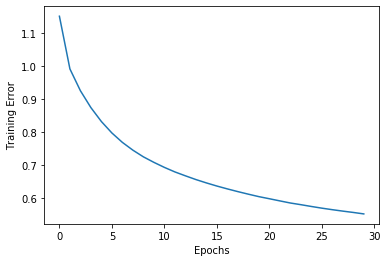

In [97]:
from keras.models import load_model

history = model2.fit([X_train.USER_ID, X_train.BUSINESS_ID,X_train.stars, X_train.useful_x,X_train.funny_x,X_train.cool_x, X_train.RestaurantsTakeOut, X_train.RestaurantsPriceRange2, X_train.GoodForKids, X_train.HasTV, X_train.RestaurantsGoodForGroups,X_train.RestaurantsReservations,X_train.RestaurantsDelivery, X_train.OutdoorSeating, X_train.BikeParking, X_train.Alcohol, X_train.RestaurantsAttire,X_train.WiFi], y_train.rating,batch_size=64,validation_data = ([X_test.USER_ID, X_test.BUSINESS_ID, X_test.stars, X_test.useful_x,X_test.funny_x,X_test.cool_x, X_test.RestaurantsTakeOut,X_test.RestaurantsPriceRange2,X_test.GoodForKids,X_test.HasTV,X_test.RestaurantsGoodForGroups, X_test.RestaurantsReservations, X_test.RestaurantsDelivery, X_test.OutdoorSeating, X_test.BikeParking, X_test.Alcohol, X_test.RestaurantsAttire, X_test.WiFi], y_test.rating), epochs=30, verbose=1,callbacks=[mc])
#model2.save('best_model.h5')
model2.load_weights("weights.best.hdf5")

plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

In [141]:
model2.load_weights("weights.best.hdf5")

Evaluating the model by calculating the mean squared error.

In [142]:
model2.evaluate([X_test.USER_ID, X_test.BUSINESS_ID, X_test.stars, X_test.useful_x,X_test.funny_x,X_test.cool_x, X_test.RestaurantsTakeOut,X_test.RestaurantsPriceRange2,X_test.GoodForKids,X_test.HasTV,X_test.RestaurantsGoodForGroups, X_test.RestaurantsReservations, X_test.RestaurantsDelivery, X_test.OutdoorSeating, X_test.BikeParking, X_test.Alcohol, X_test.RestaurantsAttire, X_test.WiFi], y_test.rating)

53192/53192 [==============================] - 6s 113us/step


1.3255793069032533

Predicting the last rating of the user 

In [143]:
predictions2 = model2.predict([X_test.USER_ID, X_test.BUSINESS_ID, X_test.stars, X_test.useful_x,X_test.funny_x,X_test.cool_x, X_test.RestaurantsTakeOut,X_test.RestaurantsPriceRange2,X_test.GoodForKids,X_test.HasTV, X_test.RestaurantsGoodForGroups,  X_test.RestaurantsReservations, X_test.RestaurantsDelivery,X_test.OutdoorSeating, X_test.BikeParking, X_test.Alcohol, X_test.RestaurantsAttire, X_test.WiFi])
#[print(predictions[i], y_test.rating.iloc[i]) for i in range(0,len(predictions))]

Finding Root mean squared error for the predictions made when the learning rate is 0.001.

In [144]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(predictions2, y_test.rating))
rms

1.151338050705122

# Training model for learning rate 0.005

In [105]:
# creating business embedding path
busi_input = Input(shape=[1], name="busi-Input")
busi_embedding = Embedding(n_busi+1, 5, name="busi-Embedding")(busi_input)
busi_vec = Flatten(name="Flatten-busi")(busi_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

#creating stars embedding path
stars_input = Input(shape=[1], name="Stars-Input")
stars_embedding = Embedding(n_stars+1, 5, name="Stars-Embedding")(stars_input)
stars_vec = Flatten(name="Flatten-Stars")(stars_embedding)

#creating useful embedding path
useful_input = Input(shape=[1], name="Useful-Input")
useful_embedding = Embedding(n_useful+1, 5, name="Useful-Embedding")(useful_input)
useful_vec = Flatten(name="Flatten-Useful")(useful_embedding)

#creating restauranttakeout embedding path
restakeout_input = Input(shape=[1], name="restakeout-Input")
restakeout_embedding = Embedding(n_restakeout + 1, 5, name="restakeout-Embedding")(restakeout_input)
restakeout_vec = Flatten(name="Flatten-restakeout")(restakeout_embedding)

#creating funny embedding path
funny_input = Input(shape=[1], name="funny-Input")
funny_embedding = Embedding(n_funny+1, 5, name="Funny-Embedding")(funny_input)
funny_vec = Flatten(name="Flatten-Funny")(funny_embedding)

#creating cool embedding path
cool_input = Input(shape=[1], name="cool-Input")
cool_embedding = Embedding(n_cool+1, 5, name="Cool-Embedding")(cool_input)
cool_vec = Flatten(name="Flatten-cool")(cool_embedding)

#creating a restaurant price range embedding path
resprice_input = Input(shape=[1], name="resprice-Input")
resprice_embedding = Embedding(n_resprice + 1, 5, name="resprice-Embedding")(resprice_input)
resprice_vec = Flatten(name="Flatten-resprice")(resprice_embedding)

#creating a Goodforkids embedding path
goodforkids_input = Input(shape=[1], name="goodforkids-Input")
goodforkids_embedding = Embedding(n_goodforkids + 1, 5, name="goodforkids-Embedding")(goodforkids_input)
goodforkids_vec = Flatten(name="Flatten-goodforkids")(goodforkids_embedding)

#creating a HasTV embedding path
hastv_input = Input(shape=[1], name="hastv-Input")
hastv_embedding = Embedding(n_hastv + 1, 5, name="hastv-Embedding")(hastv_input)
hastv_vec = Flatten(name="Flatten-hastv")(hastv_embedding)

#creating a Restaurant good for groups embedding path
resgrp_input = Input(shape=[1], name="resgrp-Input")
resgrp_embedding = Embedding(n_resgrp + 1, 5, name="resgrp-Embedding")(resgrp_input)
resgrp_vec = Flatten(name="Flatten-resgrp")(resgrp_embedding)

#creating a Restaurant Reservations embedding path
resreserve_input = Input(shape=[1], name="resreserve-Input")
resreserve_embedding = Embedding(n_resreserve + 1, 5, name="resreserve-Embedding")(resreserve_input)
resreserve_vec = Flatten(name="Flatten-resreserve")(resreserve_embedding)

#creating a restaurant delivery embedding path
resdelivery_input = Input(shape=[1], name="resdelivery-Input")
resdelivery_embedding = Embedding(n_resdelivery + 1, 5, name="resdelivery-Embedding")(resdelivery_input)
resdelivery_vec = Flatten(name="Flatten-resdelivery")(resdelivery_embedding)

#creating an outdoor seating embedding path
outdoor_input = Input(shape=[1], name="outdoor-Input")
outdoor_embedding = Embedding(n_outdoor + 1, 5, name="outdoor-Embedding")(outdoor_input)
outdoor_vec = Flatten(name="Flatten-outdoor")(outdoor_embedding)

#creating a bikeparking  embedding path
bike_input = Input(shape=[1], name="bike-Input")
bike_embedding = Embedding(n_bike + 1, 5, name="bike-Embedding")(bike_input)
bike_vec = Flatten(name="Flatten-bike")(bike_embedding)

#creating alcohol embedding path
alcohol_input = Input(shape=[1], name="alcohol-Input")
alcohol_embedding = Embedding(n_alcohol + 1, 5, name="alcohol-Embedding")(alcohol_input)
alcohol_vec = Flatten(name="Flatten-alcohol")(alcohol_embedding)

#Creating a restaurant attire path
resattire_input = Input(shape=[1], name="resattire-Input")
resattire_embedding = Embedding(n_resattire + 1, 5, name="resattire-Embedding")(resattire_input)
resattire_vec = Flatten(name="Flatten-resattire")(resattire_embedding)

#creating wifi embedding path
wifi_input = Input(shape=[1], name="wifi-Input")
wifi_embedding = Embedding(n_wifi + 1, 5, name="wifi-Embedding")(wifi_input)
wifi_vec = Flatten(name="Flatten-wifi")(wifi_embedding)


# concatenate features
conc = Concatenate()([busi_vec, user_vec, stars_vec, useful_vec,funny_vec, cool_vec,restakeout_vec,resprice_vec,goodforkids_vec,hastv_vec,resgrp_vec,resreserve_vec,resdelivery_vec, outdoor_vec,bike_vec,alcohol_vec, resattire_vec, wifi_vec])

# add fully-connected-layers
fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(32, activation='relu')(fc1)
out = Dense(1)(fc2)

# Create model and compile it and store the best model(the corresponding weights) throughout the epochs.
filepath= "weights2.best.hdf5"
model = Model([user_input, busi_input,stars_input, useful_input,funny_input,cool_input, restakeout_input,resprice_input,goodforkids_input,hastv_input,resgrp_input, resreserve_input,resdelivery_input, outdoor_input,bike_input,alcohol_input, resattire_input,wifi_input], out)
mc=ModelCheckpoint(filepath,monitor='val_loss',mode='min',save_best_only=True, verbose = 1)
optimizers.Adam(learning_rate=0.005)
model.compile('adam', 'mean_squared_error')

Fitting the model with training data having learning rate 0.005

C:\Users\arush\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 868603 samples, validate on 53192 samples
Epoch 1/30
868603/868603 [==============================] - 109s 126us/step - loss: 1.1369 - val_loss: 1.3399

Epoch 00001: val_loss improved from inf to 1.33986, saving model to weights2.best.hdf5
Epoch 2/30
868603/868603 [==============================] - 112s 128us/step - loss: 0.9790 - val_loss: 1.3077

Epoch 00002: val_loss improved from 1.33986 to 1.30774, saving model to weights2.best.hdf5
Epoch 3/30
868603/868603 [==============================] - 120s 138us/step - loss: 0.9158 - val_loss: 1.3206

Epoch 00003: val_loss did not improve from 1.30774
Epoch 4/30
868603/868603 [==============================] - 107s 123us/step - loss: 0.8681 - val_loss: 1.3440

Epoch 00004: val_loss did not improve from 1.30774
Epoch 5/30
868603/868603 [==============================] - 107s 123us/step - loss: 0.8252 - val_loss: 1.3581

Epoch 00005: val_loss did not improve from 1.30774
Epoch 6/30
868603/868603 [==============================] - 107

Text(0, 0.5, 'Training Error')

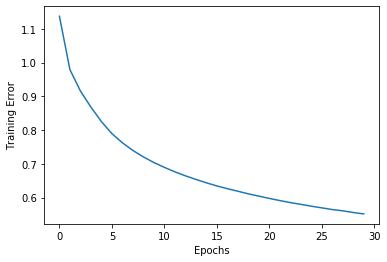

In [106]:
#fitting the model
history = model.fit([X_train.USER_ID, X_train.BUSINESS_ID,X_train.stars, X_train.useful_x,X_train.funny_x,X_train.cool_x, X_train.RestaurantsTakeOut, X_train.RestaurantsPriceRange2, X_train.GoodForKids, X_train.HasTV, X_train.RestaurantsGoodForGroups,X_train.RestaurantsReservations,X_train.RestaurantsDelivery, X_train.OutdoorSeating, X_train.BikeParking, X_train.Alcohol, X_train.RestaurantsAttire,X_train.WiFi], y_train.rating,batch_size=64,validation_data = ([X_test.USER_ID, X_test.BUSINESS_ID, X_test.stars, X_test.useful_x,X_test.funny_x,X_test.cool_x, X_test.RestaurantsTakeOut,X_test.RestaurantsPriceRange2,X_test.GoodForKids,X_test.HasTV,X_test.RestaurantsGoodForGroups, X_test.RestaurantsReservations, X_test.RestaurantsDelivery, X_test.OutdoorSeating, X_test.BikeParking, X_test.Alcohol, X_test.RestaurantsAttire, X_test.WiFi], y_test.rating), epochs=30, verbose=1,callbacks=[mc])

plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

Loading the best model from all the 30 epochs 

In [108]:
model.load_weights("weights2.best.hdf5")
model.evaluate([X_test.USER_ID, X_test.BUSINESS_ID, X_test.stars, X_test.useful_x,X_test.funny_x,X_test.cool_x, X_test.RestaurantsTakeOut,X_test.RestaurantsPriceRange2,X_test.GoodForKids,X_test.HasTV,X_test.RestaurantsGoodForGroups, X_test.RestaurantsReservations, X_test.RestaurantsDelivery, X_test.OutdoorSeating, X_test.BikeParking, X_test.Alcohol, X_test.RestaurantsAttire, X_test.WiFi], y_test.rating)

53192/53192 [==============================] - 4s 67us/step


1.3077445050830643

Predicting the last rating of the user

In [110]:
predictions = model.predict([X_test.USER_ID, X_test.BUSINESS_ID, X_test.stars, X_test.useful_x,X_test.funny_x,X_test.cool_x, X_test.RestaurantsTakeOut,X_test.RestaurantsPriceRange2,X_test.GoodForKids,X_test.HasTV, X_test.RestaurantsGoodForGroups,  X_test.RestaurantsReservations, X_test.RestaurantsDelivery,X_test.OutdoorSeating, X_test.BikeParking, X_test.Alcohol, X_test.RestaurantsAttire, X_test.WiFi])
#[print(predictions[i], y_test.rating.iloc[i]) for i in range(0,len(predictions))]

Finding Root mean squared error for the predictions made

In [111]:
rms = sqrt(mean_squared_error(predictions, y_test.rating))
rms

1.1435665722222932

# Model with learning rate 0.01

In [155]:
# creating business embedding path
busi_input = Input(shape=[1], name="busi-Input")
busi_embedding = Embedding(n_busi+1, 5, name="busi-Embedding")(busi_input)
busi_vec = Flatten(name="Flatten-busi")(busi_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

#creating stars embedding path
stars_input = Input(shape=[1], name="Stars-Input")
stars_embedding = Embedding(n_stars+1, 5, name="Stars-Embedding")(stars_input)
stars_vec = Flatten(name="Flatten-Stars")(stars_embedding)

#creating useful embedding path
useful_input = Input(shape=[1], name="Useful-Input")
useful_embedding = Embedding(n_useful+1, 5, name="Useful-Embedding")(useful_input)
useful_vec = Flatten(name="Flatten-Useful")(useful_embedding)

#creating restauranttakeout embedding path
restakeout_input = Input(shape=[1], name="restakeout-Input")
restakeout_embedding = Embedding(n_restakeout + 1, 5, name="restakeout-Embedding")(restakeout_input)
restakeout_vec = Flatten(name="Flatten-restakeout")(restakeout_embedding)

#creating funny embedding path
funny_input = Input(shape=[1], name="funny-Input")
funny_embedding = Embedding(n_funny+1, 5, name="Funny-Embedding")(funny_input)
funny_vec = Flatten(name="Flatten-Funny")(funny_embedding)

#creating cool embedding path
cool_input = Input(shape=[1], name="cool-Input")
cool_embedding = Embedding(n_cool+1, 5, name="Cool-Embedding")(cool_input)
cool_vec = Flatten(name="Flatten-cool")(cool_embedding)

#creating a restaurant price range embedding path
resprice_input = Input(shape=[1], name="resprice-Input")
resprice_embedding = Embedding(n_resprice + 1, 5, name="resprice-Embedding")(resprice_input)
resprice_vec = Flatten(name="Flatten-resprice")(resprice_embedding)

#creating a Goodforkids embedding path
goodforkids_input = Input(shape=[1], name="goodforkids-Input")
goodforkids_embedding = Embedding(n_goodforkids + 1, 5, name="goodforkids-Embedding")(goodforkids_input)
goodforkids_vec = Flatten(name="Flatten-goodforkids")(goodforkids_embedding)

#creating a HasTV embedding path
hastv_input = Input(shape=[1], name="hastv-Input")
hastv_embedding = Embedding(n_hastv + 1, 5, name="hastv-Embedding")(hastv_input)
hastv_vec = Flatten(name="Flatten-hastv")(hastv_embedding)

#creating a Restaurant good for groups embedding path
resgrp_input = Input(shape=[1], name="resgrp-Input")
resgrp_embedding = Embedding(n_resgrp + 1, 5, name="resgrp-Embedding")(resgrp_input)
resgrp_vec = Flatten(name="Flatten-resgrp")(resgrp_embedding)

#creating a Restaurant Reservations embedding path
resreserve_input = Input(shape=[1], name="resreserve-Input")
resreserve_embedding = Embedding(n_resreserve + 1, 5, name="resreserve-Embedding")(resreserve_input)
resreserve_vec = Flatten(name="Flatten-resreserve")(resreserve_embedding)

#creating a restaurant delivery embedding path
resdelivery_input = Input(shape=[1], name="resdelivery-Input")
resdelivery_embedding = Embedding(n_resdelivery + 1, 5, name="resdelivery-Embedding")(resdelivery_input)
resdelivery_vec = Flatten(name="Flatten-resdelivery")(resdelivery_embedding)

#creating an outdoor seating embedding path
outdoor_input = Input(shape=[1], name="outdoor-Input")
outdoor_embedding = Embedding(n_outdoor + 1, 5, name="outdoor-Embedding")(outdoor_input)
outdoor_vec = Flatten(name="Flatten-outdoor")(outdoor_embedding)

#creating a bikeparking  embedding path
bike_input = Input(shape=[1], name="bike-Input")
bike_embedding = Embedding(n_bike + 1, 5, name="bike-Embedding")(bike_input)
bike_vec = Flatten(name="Flatten-bike")(bike_embedding)

#creating alcohol embedding path
alcohol_input = Input(shape=[1], name="alcohol-Input")
alcohol_embedding = Embedding(n_alcohol + 1, 5, name="alcohol-Embedding")(alcohol_input)
alcohol_vec = Flatten(name="Flatten-alcohol")(alcohol_embedding)

#Creating a restaurant attire path
resattire_input = Input(shape=[1], name="resattire-Input")
resattire_embedding = Embedding(n_resattire + 1, 5, name="resattire-Embedding")(resattire_input)
resattire_vec = Flatten(name="Flatten-resattire")(resattire_embedding)

#creating wifi embedding path
wifi_input = Input(shape=[1], name="wifi-Input")
wifi_embedding = Embedding(n_wifi + 1, 5, name="wifi-Embedding")(wifi_input)
wifi_vec = Flatten(name="Flatten-wifi")(wifi_embedding)


# concatenate features
conc = Concatenate()([busi_vec, user_vec, stars_vec, useful_vec,funny_vec, cool_vec,restakeout_vec,resprice_vec,goodforkids_vec,hastv_vec,resgrp_vec,resreserve_vec,resdelivery_vec, outdoor_vec,bike_vec,alcohol_vec, resattire_vec, wifi_vec])

# add fully-connected-layers
fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(32, activation='relu')(fc1)
out = Dense(1)(fc2)

# Create model and compile it and store the best model(the corresponding weights) throughout the epochs.
filepath= "weights3.best.hdf5"
model3 = Model([user_input, busi_input,stars_input, useful_input,funny_input,cool_input, restakeout_input,resprice_input,goodforkids_input,hastv_input,resgrp_input, resreserve_input,resdelivery_input, outdoor_input,bike_input,alcohol_input, resattire_input,wifi_input], out)
mc=ModelCheckpoint(filepath,monitor='val_loss',mode='min',save_best_only=True, verbose = 1)
optimizers.Adam(learning_rate=0.01)
model3.compile('adam', 'mean_squared_error')

C:\Users\arush\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 868603 samples, validate on 53192 samples
Epoch 1/30
868603/868603 [==============================] - 141s 162us/step - loss: 1.1456 - val_loss: 1.3460

Epoch 00001: val_loss improved from inf to 1.34598, saving model to weights3.best.hdf5
Epoch 2/30
868603/868603 [==============================] - 131s 151us/step - loss: 0.9854 - val_loss: 1.3339

Epoch 00002: val_loss improved from 1.34598 to 1.33393, saving model to weights3.best.hdf5
Epoch 3/30
868603/868603 [==============================] - 127s 146us/step - loss: 0.9201 - val_loss: 1.3161

Epoch 00003: val_loss improved from 1.33393 to 1.31605, saving model to weights3.best.hdf5
Epoch 4/30
868603/868603 [==============================] - 148s 170us/step - loss: 0.8703 - val_loss: 1.3422

Epoch 00004: val_loss did not improve from 1.31605
Epoch 5/30
868603/868603 [==============================] - 149s 171us/step - loss: 0.8287 - val_loss: 1.3605

Epoch 00005: val_loss did not improve from 1.31605
Epoch 6/30
868603/86860

Text(0, 0.5, 'Training Error')

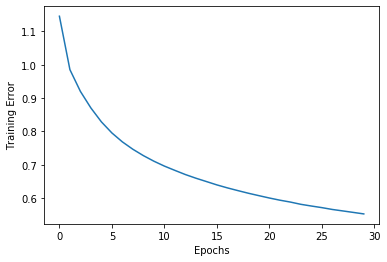

In [156]:
#fitting the model
history = model3.fit([X_train.USER_ID, X_train.BUSINESS_ID,X_train.stars, X_train.useful_x,X_train.funny_x,X_train.cool_x, X_train.RestaurantsTakeOut, X_train.RestaurantsPriceRange2, X_train.GoodForKids, X_train.HasTV, X_train.RestaurantsGoodForGroups,X_train.RestaurantsReservations,X_train.RestaurantsDelivery, X_train.OutdoorSeating, X_train.BikeParking, X_train.Alcohol, X_train.RestaurantsAttire,X_train.WiFi], y_train.rating,batch_size=64,validation_data = ([X_test.USER_ID, X_test.BUSINESS_ID, X_test.stars, X_test.useful_x,X_test.funny_x,X_test.cool_x, X_test.RestaurantsTakeOut,X_test.RestaurantsPriceRange2,X_test.GoodForKids,X_test.HasTV,X_test.RestaurantsGoodForGroups, X_test.RestaurantsReservations, X_test.RestaurantsDelivery, X_test.OutdoorSeating, X_test.BikeParking, X_test.Alcohol, X_test.RestaurantsAttire, X_test.WiFi], y_test.rating), epochs=30, verbose=1,callbacks=[mc])

plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

Evaluating the trained model having learning rate 0.01

In [157]:
model3.load_weights("weights3.best.hdf5")
model3.evaluate([X_test.USER_ID, X_test.BUSINESS_ID, X_test.stars, X_test.useful_x,X_test.funny_x,X_test.cool_x, X_test.RestaurantsTakeOut,X_test.RestaurantsPriceRange2,X_test.GoodForKids,X_test.HasTV,X_test.RestaurantsGoodForGroups, X_test.RestaurantsReservations, X_test.RestaurantsDelivery, X_test.OutdoorSeating, X_test.BikeParking, X_test.Alcohol, X_test.RestaurantsAttire, X_test.WiFi], y_test.rating)

53192/53192 [==============================] - 6s 107us/step


1.3160515319926342

Predicting the last rating of the user


In [158]:
predictions3 = model3.predict([X_test.USER_ID, X_test.BUSINESS_ID, X_test.stars, X_test.useful_x,X_test.funny_x,X_test.cool_x, X_test.RestaurantsTakeOut,X_test.RestaurantsPriceRange2,X_test.GoodForKids,X_test.HasTV, X_test.RestaurantsGoodForGroups,  X_test.RestaurantsReservations, X_test.RestaurantsDelivery,X_test.OutdoorSeating, X_test.BikeParking, X_test.Alcohol, X_test.RestaurantsAttire, X_test.WiFi])
#[print(predictions[i], y_test.rating.iloc[i]) for i in range(0,len(predictions))]

In [159]:
rms = sqrt(mean_squared_error(predictions3, y_test.rating))
rms

1.14719289159567

# Model with learning rate  = 0.0001

Creating the model with learning rate 0.0001

In [163]:
# creating business embedding path
busi_input = Input(shape=[1], name="busi-Input")
busi_embedding = Embedding(n_busi+1, 5, name="busi-Embedding")(busi_input)
busi_vec = Flatten(name="Flatten-busi")(busi_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

#creating stars embedding path
stars_input = Input(shape=[1], name="Stars-Input")
stars_embedding = Embedding(n_stars+1, 5, name="Stars-Embedding")(stars_input)
stars_vec = Flatten(name="Flatten-Stars")(stars_embedding)

#creating useful embedding path
useful_input = Input(shape=[1], name="Useful-Input")
useful_embedding = Embedding(n_useful+1, 5, name="Useful-Embedding")(useful_input)
useful_vec = Flatten(name="Flatten-Useful")(useful_embedding)

#creating restauranttakeout embedding path
restakeout_input = Input(shape=[1], name="restakeout-Input")
restakeout_embedding = Embedding(n_restakeout + 1, 5, name="restakeout-Embedding")(restakeout_input)
restakeout_vec = Flatten(name="Flatten-restakeout")(restakeout_embedding)

#creating funny embedding path
funny_input = Input(shape=[1], name="funny-Input")
funny_embedding = Embedding(n_funny+1, 5, name="Funny-Embedding")(funny_input)
funny_vec = Flatten(name="Flatten-Funny")(funny_embedding)

#creating cool embedding path
cool_input = Input(shape=[1], name="cool-Input")
cool_embedding = Embedding(n_cool+1, 5, name="Cool-Embedding")(cool_input)
cool_vec = Flatten(name="Flatten-cool")(cool_embedding)

#creating a restaurant price range embedding path
resprice_input = Input(shape=[1], name="resprice-Input")
resprice_embedding = Embedding(n_resprice + 1, 5, name="resprice-Embedding")(resprice_input)
resprice_vec = Flatten(name="Flatten-resprice")(resprice_embedding)

#creating a Goodforkids embedding path
goodforkids_input = Input(shape=[1], name="goodforkids-Input")
goodforkids_embedding = Embedding(n_goodforkids + 1, 5, name="goodforkids-Embedding")(goodforkids_input)
goodforkids_vec = Flatten(name="Flatten-goodforkids")(goodforkids_embedding)

#creating a HasTV embedding path
hastv_input = Input(shape=[1], name="hastv-Input")
hastv_embedding = Embedding(n_hastv + 1, 5, name="hastv-Embedding")(hastv_input)
hastv_vec = Flatten(name="Flatten-hastv")(hastv_embedding)

#creating a Restaurant good for groups embedding path
resgrp_input = Input(shape=[1], name="resgrp-Input")
resgrp_embedding = Embedding(n_resgrp + 1, 5, name="resgrp-Embedding")(resgrp_input)
resgrp_vec = Flatten(name="Flatten-resgrp")(resgrp_embedding)

#creating a Restaurant Reservations embedding path
resreserve_input = Input(shape=[1], name="resreserve-Input")
resreserve_embedding = Embedding(n_resreserve + 1, 5, name="resreserve-Embedding")(resreserve_input)
resreserve_vec = Flatten(name="Flatten-resreserve")(resreserve_embedding)

#creating a restaurant delivery embedding path
resdelivery_input = Input(shape=[1], name="resdelivery-Input")
resdelivery_embedding = Embedding(n_resdelivery + 1, 5, name="resdelivery-Embedding")(resdelivery_input)
resdelivery_vec = Flatten(name="Flatten-resdelivery")(resdelivery_embedding)

#creating an outdoor seating embedding path
outdoor_input = Input(shape=[1], name="outdoor-Input")
outdoor_embedding = Embedding(n_outdoor + 1, 5, name="outdoor-Embedding")(outdoor_input)
outdoor_vec = Flatten(name="Flatten-outdoor")(outdoor_embedding)

#creating a bikeparking  embedding path
bike_input = Input(shape=[1], name="bike-Input")
bike_embedding = Embedding(n_bike + 1, 5, name="bike-Embedding")(bike_input)
bike_vec = Flatten(name="Flatten-bike")(bike_embedding)

#creating alcohol embedding path
alcohol_input = Input(shape=[1], name="alcohol-Input")
alcohol_embedding = Embedding(n_alcohol + 1, 5, name="alcohol-Embedding")(alcohol_input)
alcohol_vec = Flatten(name="Flatten-alcohol")(alcohol_embedding)

#Creating a restaurant attire path
resattire_input = Input(shape=[1], name="resattire-Input")
resattire_embedding = Embedding(n_resattire + 1, 5, name="resattire-Embedding")(resattire_input)
resattire_vec = Flatten(name="Flatten-resattire")(resattire_embedding)

#creating wifi embedding path
wifi_input = Input(shape=[1], name="wifi-Input")
wifi_embedding = Embedding(n_wifi + 1, 5, name="wifi-Embedding")(wifi_input)
wifi_vec = Flatten(name="Flatten-wifi")(wifi_embedding)


# concatenate features
conc = Concatenate()([busi_vec, user_vec, stars_vec, useful_vec,funny_vec, cool_vec,restakeout_vec,resprice_vec,goodforkids_vec,hastv_vec,resgrp_vec,resreserve_vec,resdelivery_vec, outdoor_vec,bike_vec,alcohol_vec, resattire_vec, wifi_vec])

# add fully-connected-layers
fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(32, activation='relu')(fc1)
out = Dense(1)(fc2)

# Create model and compile it and store the best model(the corresponding weights) throughout the epochs.
filepath= "weights4.best.hdf5"
model4 = Model([user_input, busi_input,stars_input, useful_input,funny_input,cool_input, restakeout_input,resprice_input,goodforkids_input,hastv_input,resgrp_input, resreserve_input,resdelivery_input, outdoor_input,bike_input,alcohol_input, resattire_input,wifi_input], out)
mc=ModelCheckpoint(filepath,monitor='val_loss',mode='min',save_best_only=True, verbose = 1)
optimizers.Adam(learning_rate=0.0001)
model4.compile('adam', 'mean_squared_error')

# Fitting model using the training data 

C:\Users\arush\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 868603 samples, validate on 53192 samples
Epoch 1/30
868603/868603 [==============================] - 128s 147us/step - loss: 1.1512 - val_loss: 1.3333

Epoch 00001: val_loss improved from inf to 1.33335, saving model to weights4.best.hdf5
Epoch 2/30
868603/868603 [==============================] - 122s 140us/step - loss: 0.9891 - val_loss: 1.3230

Epoch 00002: val_loss improved from 1.33335 to 1.32302, saving model to weights4.best.hdf5
Epoch 3/30
868603/868603 [==============================] - 126s 145us/step - loss: 0.9220 - val_loss: 1.3194

Epoch 00003: val_loss improved from 1.32302 to 1.31940, saving model to weights4.best.hdf5
Epoch 4/30
868603/868603 [==============================] - 121s 139us/step - loss: 0.8698 - val_loss: 1.3277

Epoch 00004: val_loss did not improve from 1.31940
Epoch 5/30
868603/868603 [==============================] - 121s 140us/step - loss: 0.8277 - val_loss: 1.3540

Epoch 00005: val_loss did not improve from 1.31940
Epoch 6/30
868603/86860

Text(0, 0.5, 'Training Error')

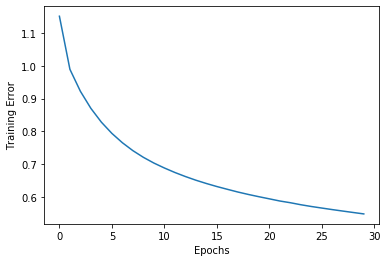

In [164]:
#fitting the model
history = model4.fit([X_train.USER_ID, X_train.BUSINESS_ID,X_train.stars, X_train.useful_x,X_train.funny_x,X_train.cool_x, X_train.RestaurantsTakeOut, X_train.RestaurantsPriceRange2, X_train.GoodForKids, X_train.HasTV, X_train.RestaurantsGoodForGroups,X_train.RestaurantsReservations,X_train.RestaurantsDelivery, X_train.OutdoorSeating, X_train.BikeParking, X_train.Alcohol, X_train.RestaurantsAttire,X_train.WiFi], y_train.rating,batch_size=64,validation_data = ([X_test.USER_ID, X_test.BUSINESS_ID, X_test.stars, X_test.useful_x,X_test.funny_x,X_test.cool_x, X_test.RestaurantsTakeOut,X_test.RestaurantsPriceRange2,X_test.GoodForKids,X_test.HasTV,X_test.RestaurantsGoodForGroups, X_test.RestaurantsReservations, X_test.RestaurantsDelivery, X_test.OutdoorSeating, X_test.BikeParking, X_test.Alcohol, X_test.RestaurantsAttire, X_test.WiFi], y_test.rating), epochs=30, verbose=1,callbacks=[mc])

plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

Loading the best model saved during the 30 epochs

In [165]:
model4.load_weights("weights4.best.hdf5")
model4.evaluate([X_test.USER_ID, X_test.BUSINESS_ID, X_test.stars, X_test.useful_x,X_test.funny_x,X_test.cool_x, X_test.RestaurantsTakeOut,X_test.RestaurantsPriceRange2,X_test.GoodForKids,X_test.HasTV,X_test.RestaurantsGoodForGroups, X_test.RestaurantsReservations, X_test.RestaurantsDelivery, X_test.OutdoorSeating, X_test.BikeParking, X_test.Alcohol, X_test.RestaurantsAttire, X_test.WiFi], y_test.rating)

53192/53192 [==============================] - 4s 66us/step


1.3193972070766833

# Making predictions on the trained model

In [172]:
predictions4 = model4.predict([X_test.USER_ID, X_test.BUSINESS_ID, X_test.stars, X_test.useful_x,X_test.funny_x,X_test.cool_x, X_test.RestaurantsTakeOut,X_test.RestaurantsPriceRange2,X_test.GoodForKids,X_test.HasTV, X_test.RestaurantsGoodForGroups,  X_test.RestaurantsReservations, X_test.RestaurantsDelivery,X_test.OutdoorSeating, X_test.BikeParking, X_test.Alcohol, X_test.RestaurantsAttire, X_test.WiFi])
#[print(predictions4[i], y_test.rating.iloc[i]) for i in range(0,len(predictions))]

Calculating the RMSE

In [167]:
rmse = sqrt(mean_squared_error(predictions4, y_test.rating))
rmse

1.1486501680560461

# Predictions for the model with learning rate = 0.01

In [176]:
[print(predictions3[i], y_test.rating.iloc[i]) for i in range(0,10)]

[1.5705789] 1.0
[4.302258] 4.0
[3.5791516] 3.0
[3.8916733] 3.0
[4.272047] 5.0
[4.527193] 4.0
[4.855596] 4.0
[4.0687547] 4.0
[4.186886] 3.0
[1.4515109] 3.0


[None, None, None, None, None, None, None, None, None, None]